# 线性回归

思想：用一条直线拟合样本点，让残差平方和最小。

假设函数：$h(x)=X\theta$

参数：$\theta=(\theta_0,...,\theta_n)^{'}$

代价函数：$J(\theta)=\frac{1}{2m}\sum^{m}_{i=1}(y^{(i)}-h(x^{(i)}))^2=\frac{1}{2m}||y-X\theta||_2^2$

最优参数：$\hat{\theta}=(X^TX)^{-1}X^Ty$

梯度：$\bigtriangledown J(\theta)=\frac{1}{m}X^T(h(x)-y)$

## 简单线性回归

$AQI = k*PM2.5 + b$

In [1]:
import pandas as pd

# wh_data = pd.read_csv('../AQI_maincity/武汉.csv', usecols=[0,1,3], index_col='date', encoding='utf-8', engine='python')  # engine='python'解决中文问题
wh_data = pd.read_csv('武汉.csv', usecols=[0,1,3], index_col='date', encoding='utf-8', engine='python')
wh_data.head()

,AQI,PM2.5
date,,
2014-01-01,203,153
2014-01-02,231,181
2014-01-03,224,174
2014-01-04,147,112
2014-01-05,195,147


In [0]:
X = wh_data.values[:, 1].reshape(-1,1)  # PM2.5
y = wh_data.values[:, 0]                # AQI

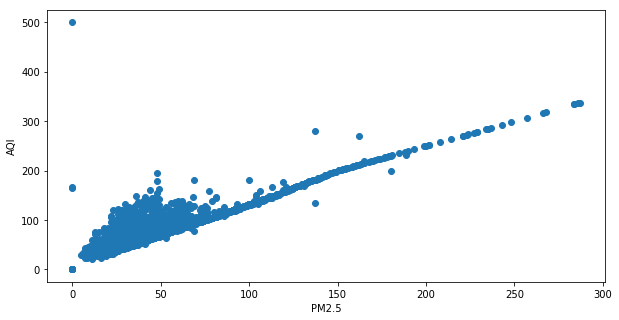

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

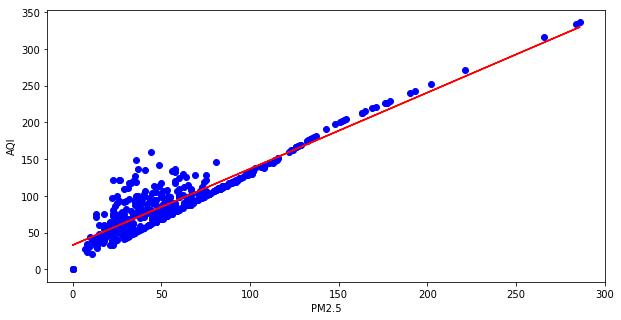

In [6]:
yhat = lin_reg.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, c='b')
plt.plot(X_test, yhat, c='r')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import sqrt

mse = mean_squared_error(y_test, yhat)   # 均方误差
rmse = sqrt(mse)                         # 均方根误差
mae = mean_absolute_error(y_test, yhat)  # 平均绝对误差
r2 = r2_score(y_test, yhat)              # R2
print(mse, rmse, mae, r2)

307.76387550412505 17.54320026403749 13.098962058039692 0.8610501219555409


In [8]:
lin_reg.score(X_test, y_test)

0.8610501219555409

## 多元线性回归

### 1.导入数据并清洗

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# wh_data = pd.read_csv('../AQI_maincity/武汉.csv',index_col='date', encoding='utf-8', engine='python')
wh_data = pd.read_csv('武汉.csv',index_col='date', encoding='utf-8', engine='python')
wh_data.drop(index=wh_data[wh_data['质量等级']=='无'].index, columns=['质量等级'], inplace=True) # 删除异常值和无关变量
wh_data.head()

,AQI,PM2.5,PM10,SO2,CO,NO2,O3_8h
date,,,,,,,
2014-01-01,203,153,210,70,2.0,106,55
2014-01-02,231,181,254,89,2.4,112,26
2014-01-03,224,174,226,63,1.7,84,55
2014-01-04,147,112,184,73,1.6,87,40
2014-01-05,195,147,213,89,2.2,91,53


### 2.数据探索与可视化

**描述性统计信息**

In [11]:
wh_data.describe()

,AQI,PM2.5,PM10,SO2,CO,NO2,O3_8h
count,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000
mean,96.584895,61.116318,94.311466,16.538589,1.090849,48.830761,92.165932
std,47.570103,41.227822,51.390779,13.154913,0.349634,20.225358,49.062929
min,21.000000,0.000000,0.000000,2.000000,0.400000,13.000000,0.000000
25%,64.000000,32.000000,56.000000,7.000000,0.900000,33.000000,53.000000
50%,89.000000,51.000000,86.000000,13.000000,1.000000,45.000000,86.000000
75%,115.000000,79.000000,122.000000,21.000000,1.300000,61.000000,128.000000
max,500.000000,287.000000,406.000000,107.000000,2.700000,119.000000,261.000000


**分布情况**

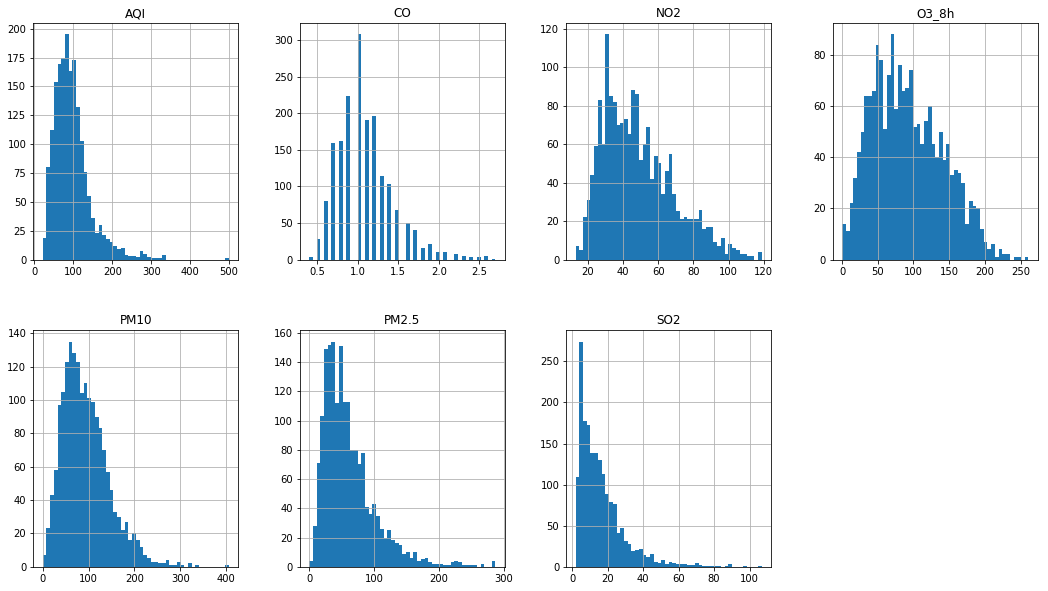

In [12]:
wh_data.hist(bins=50, figsize=(18,10), layout=(2,-1))
plt.show()

**相关性检验**

In [13]:
wh_data.corr()

,AQI,PM2.5,PM10,SO2,CO,NO2,O3_8h
AQI,1.000000,0.895182,0.789422,0.534618,0.702115,0.572624,0.042591
PM2.5,0.895182,1.000000,0.810986,0.604777,0.789716,0.602696,-0.204560
PM10,0.789422,0.810986,1.000000,0.600388,0.614699,0.722142,0.079076
SO2,0.534618,0.604777,0.600388,1.000000,0.528623,0.568798,-0.089343
CO,0.702115,0.789716,0.614699,0.528623,1.000000,0.630969,-0.291365
NO2,0.572624,0.602696,0.722142,0.568798,0.630969,1.000000,-0.064356
O3_8h,0.042591,-0.204560,0.079076,-0.089343,-0.291365,-0.064356,1.000000


### 3.训练模型

**创建测试集并训练**

In [0]:
from sklearn.model_selection import train_test_split

X, y = wh_data.iloc[:, 1:], wh_data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**评估模型**

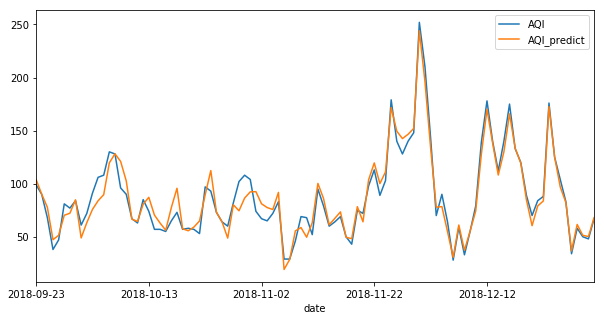

In [16]:
wh_data['AQI_predict'] = lin_reg.predict(X)
wh_data[['AQI', 'AQI_predict']].iloc[-100:].plot(figsize=(10,5))
plt.show()

In [17]:
lin_reg.score(X_test, y_test)

0.764828182866737

In [18]:
print(np.sort(lin_reg.coef_))
print(X.columns[np.argsort(lin_reg.coef_)])

[-0.15176815  0.00975613  0.04127021  0.23228182  1.0307278   7.30925957]
Index(['SO2', 'NO2', 'PM10', 'O3_8h', 'PM2.5', 'CO'], dtype='object')


### 随机梯度下降法

In [0]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
standardscaler.fit(X_train)
X_train_sca = standardscaler.transform(X_train)
X_test_sca = standardscaler.transform(X_test)

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000)
sgd_reg.fit(X_train_sca, y_train)
sgd_reg.score(X_test_sca, y_test)

0.7648229165818989

### 残差检验

count    1814.000000
mean        0.198748
std        17.993145
min       -32.722715
25%        -9.024320
50%        -1.452639
75%         6.858841
max       473.380904
Name: AQI, dtype: float64


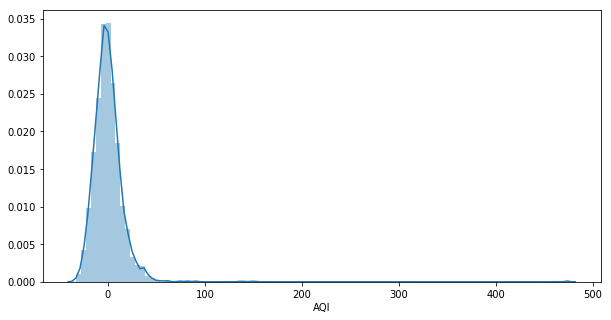

In [21]:
import seaborn as sns

y_hat = lin_reg.predict(X)
e = y - y_hat
print(e.describe())

plt.figure(figsize=(10,5))
sns.distplot(e, bins=100)
plt.show()

In [22]:
from scipy.stats import kstest, shapiro, normaltest, anderson

kstest(e, cdf='norm', alternative='two_sided')  # 正态检验
# shapiro(e)
# normaltest(e, axis=0)
# anderson(e, dist ='norm')

KstestResult(statistic=0.45736554124832396, pvalue=0.0)

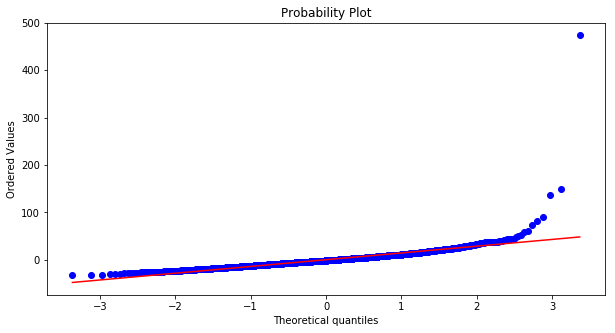

In [23]:
from scipy.stats import probplot

plt.figure(figsize=(10,5))
probplot(e, dist='norm', plot=plt)  # q-q图
plt.show()

## 使用statsmodels

In [24]:
import statsmodels.api as sm

X_b = sm.add_constant(X)  #增加常数列
linear_model = sm.OLS(y, X_b)
results = linear_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1810.
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:09:36   Log-Likelihood:                -7813.4
No. Observations:                1814   AIC:                         1.564e+04
Df Residuals:                    1807   BIC:                         1.568e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8716      2.008      0.434      0.6

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 正则化

### 岭回归

代价函数：$J(\theta)=\frac{1}{2m}(\sum^{m}_{i=1}(y^{(i)}-X^{(i)}\theta)^2+\lambda\sum^{n}_{j=1}\theta_j^2)$

最优参数：$\hat{\theta}=(X^TX+\lambda I)^{-1}X^Ty$

梯度：$\bigtriangledown J(\theta)=\frac{1}{m}X^T(X\theta-y)+\lambda w$ where $w=(\theta_1,...,\theta_n)^{'}$

In [25]:
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV()
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [26]:
print(f'best alpha:{ridge_reg.alpha_}')
print(f'best score:{ridge_reg.score(X_test, y_test)}')

best alpha:10.0
best score:0.7645371342061437
